Student Performance Dataset
1. Import Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

2. Load and Explore Dataset

In [4]:
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print(df.shape)
df.head()


(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Insight:All features for Iris setosa have small, consistent values: short petals and sepals, and fixed petal width. These traits make setosa easily distinguishable from other Iris species.

3. Data Cleaning

In [5]:
# Check missing values
print(df.isnull().sum())

# Check data types
print(df.info())

# Rename columns for simplicity
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Insight:The StudentPerformance (Iris) dataset is complete with 150 samples and no missing values—ready for reliable analysis and modeling.

4. NumPy Operations

In [4]:
# Convert columns to numpy arrays
sepal_length = np.array(df['sepal_length'])
petal_length = np.array(df['petal_length'])

# Compute basic statistics
print("Mean Sepal Length:", np.mean(sepal_length))
print("Max Petal Length:", np.max(petal_length))
print("Min Petal Length:", np.min(petal_length))
print("Standard Deviation (Sepal Length):", np.std(sepal_length))

# Filter flowers with long petals
long_petals = df[np.array(petal_length > np.mean(petal_length))]
long_petals.head()


Mean Sepal Length: 5.843333333333334
Max Petal Length: 6.9
Min Petal Length: 1.0
Standard Deviation (Sepal Length): 0.8253012917851409


,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


Insight:Iris data shows the average sepal length is about 5.84 cm, petal length varies widely (1.0–6.9 cm), and Versicolor species typically have intermediate feature values.

5. Pandas Analysis

In [5]:
# Species-wise average measurements
species_mean = df.groupby('species').mean().reset_index()
print(species_mean)

# Correlation matrix
corr = df.corr(numeric_only=True)
print(corr)


      species  sepal_length  sepal_width  petal_length  petal_width
0      setosa         5.006        3.428         1.462        0.246
1  versicolor         5.936        2.770         4.260        1.326
2   virginica         6.588        2.974         5.552        2.026
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


Insight:Virginica has the largest average values for all features; petal length and petal width are strongly correlated, while sepal width shows weak negative correlation with other measurements.

6. Data Visualization
(a) Pairplot — Relationships Between Features

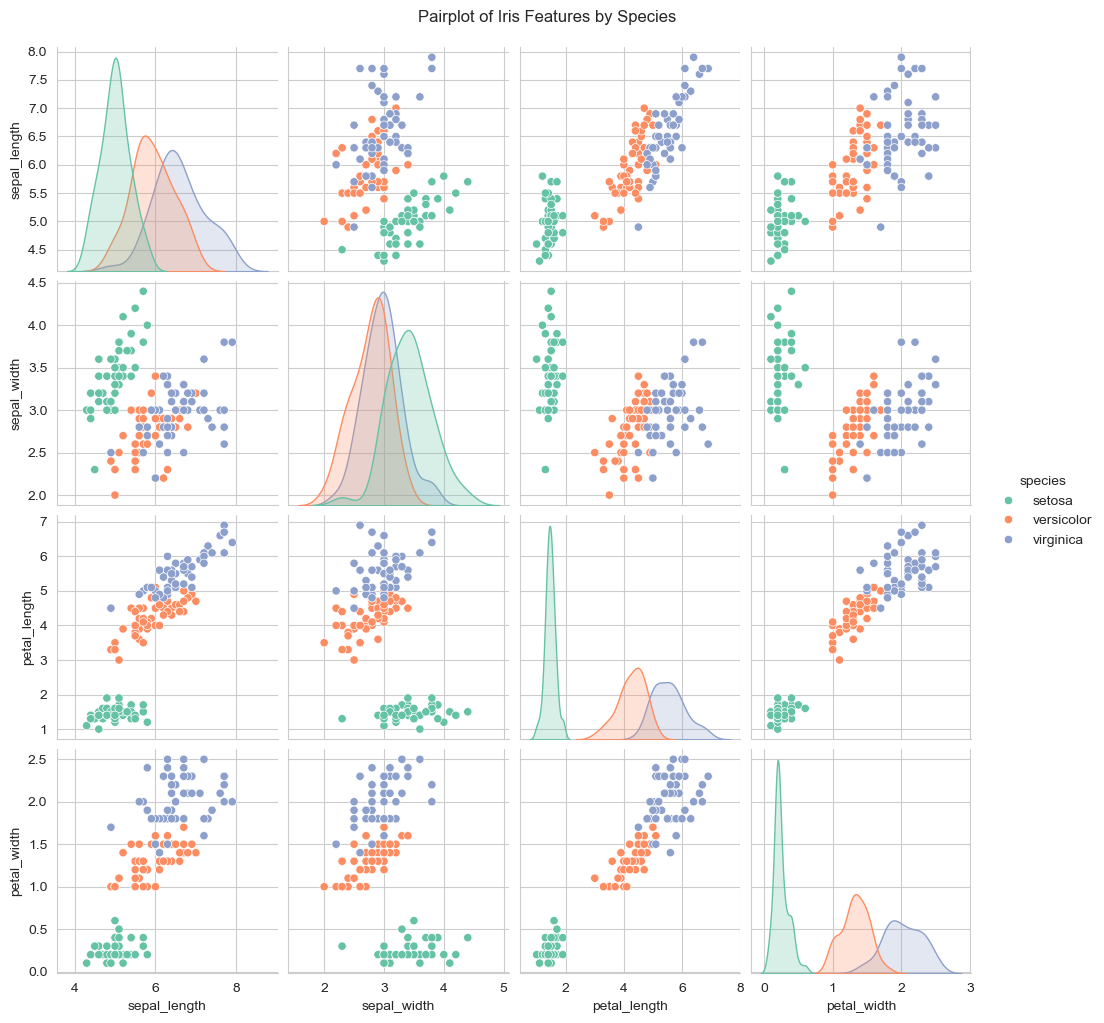

In [6]:
sns.pairplot(df, hue='species', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()


Insight:Feature pairs reveal clear clustering by species; setosa is well-separated, while versicolor and virginica partially overlap but are generally distinguishable across most feature combinations.

(b) Boxplot — Sepal Length by Species

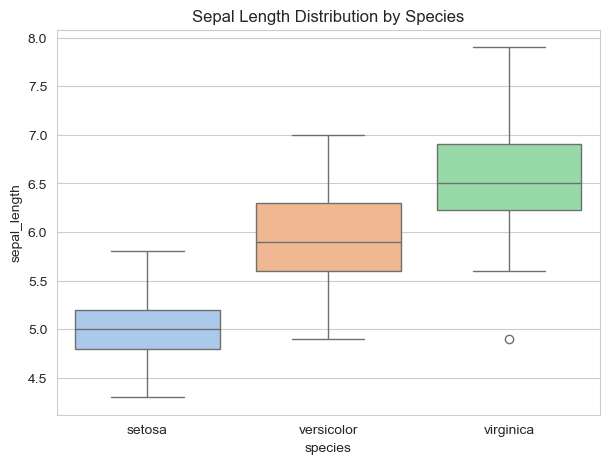

In [6]:
plt.figure(figsize=(7,5))
sns.boxplot(x='species', y='sepal_length', data=df, hue='species', palette='pastel', legend=False)
plt.title('Sepal Length Distribution by Species')
plt.show()



Insight:Sepal length increases from setosa to versicolor to virginica, showing a clear size separation among species.

(c) Scatter Plot — Petal Length vs Petal Width

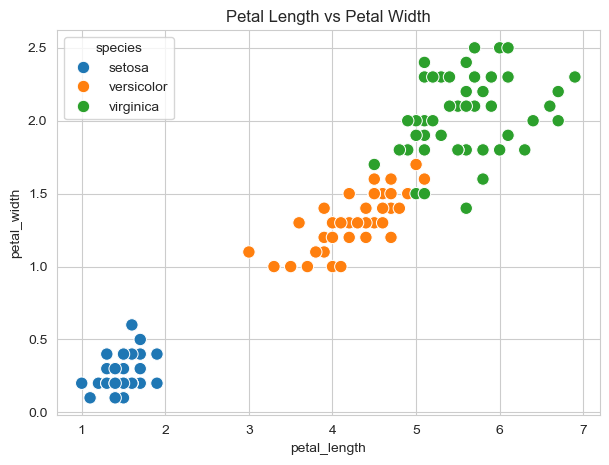

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, s=80)
plt.title('Petal Length vs Petal Width')
plt.show()


Insight:
Each Iris species forms a clear cluster: setosa has the smallest petals, versicolor is intermediate, and virginica shows the largest petal length and width.

(d) Heatmap — Correlation Among Features

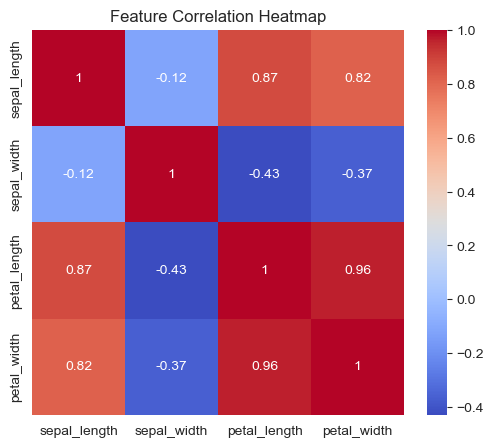

In [9]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Insight:Petal length and petal width show a strong positive correlation, while sepal width is weakly or negatively correlated with other features.